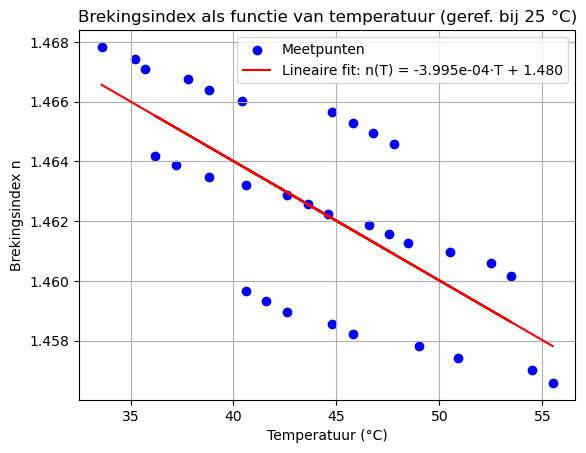

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Constantes
lambda_laser = 532e-9   # golflengte laser (m)
d = 10e-3                  # dikte cuvet/plaat (m)
n_ref = 1.47              # bekende brekingsindex bij 25 °C
T_ref = 25.0              # referentietemperatuur

# Data
data = {
    "T_begin": [
        56, 55, 51.4, 49.5, 46.3, 45.3, 43.1, 42.1, 41.1,
        54, 53, 51, 49, 48, 47.1, 45.1, 44.1, 43.1, 41.1,
        39.1, 37.7, 36.7, 48.3, 47.3, 46.3, 45.3, 40.9,
        39.3, 38.3, 35.7, 35.7, 34.1
    ],
    "T_eind": [
        55, 54, 50.4, 48.5, 45.3, 44.3, 42.1, 41.1, 40.1,
        53, 52, 50, 48, 47.1, 46.1, 44.1, 43.1, 42.1, 40.1,
        38.5, 36.7, 35.7, 47.3, 46.3, 45.3, 44.3, 39.9,
        38.3, 37.3, 35.7, 34.7, 33.1
    ],
    "N": [
        21, 16, 16, 15, 14, 13, 15, 14, 13,
        19, 16, 14, 11, 11, 12, 14, 12, 12, 12,
        10, 15, 12, 15, 14, 12, 14, 14,
        14, 13, 13, 13, 15
    ]
}

df = pd.DataFrame(data)

# Gemiddelde temperatuur
df["T_mean"] = (df["T_begin"] + df["T_eind"]) / 2

# Verandering in brekingsindex per interval
df["delta_n"] = (df["N"] * lambda_laser) / (2 * d)

# Cumulatieve verandering
df["Delta_n_cum"] = df["delta_n"].cumsum()

# Extrapolatie naar referentiepunt (T = 25 °C)
coeffs_tmp = np.polyfit(df["T_mean"], df["Delta_n_cum"], 1)
fit_tmp = np.poly1d(coeffs_tmp)
Delta_n_at_ref = fit_tmp(T_ref)

# Absolute brekingsindex
df["n"] = n_ref + (df["Delta_n_cum"] - Delta_n_at_ref)

# Lineaire fit voor n(T)
coeffs = np.polyfit(df["T_mean"], df["n"], 1)
fit_fn = np.poly1d(coeffs)

# Plot: brekingsindex als functie van temperatuur
plt.figure()
plt.scatter(df["T_mean"], df["n"], color="blue", label="Meetpunten")
plt.plot(df["T_mean"], fit_fn(df["T_mean"]), "r-",
         label=f"Lineaire fit: n(T) = {coeffs[0]:.3e}·T + {coeffs[1]:.3f}")
plt.xlabel("Temperatuur (°C)")
plt.ylabel("Brekingsindex n")
plt.title("Brekingsindex als functie van temperatuur (geref. bij 25 °C)")
plt.legend()
plt.grid(True)
plt.show()
